# bvn_data
Notebook to produce data for frequentist confidence region video.

In [1]:
suppressWarnings(suppressMessages(require(readr)))
suppressWarnings(suppressMessages(require(dplyr)))
suppressWarnings(suppressMessages(require(jocre)))
suppressWarnings(suppressMessages(require(mixtools)))
suppressWarnings(suppressMessages(require(MASS)))

## Draw one sample of bivariate normal data 
As shown here: https://blog.revolutionanalytics.com/2016/08/simulating-form-the-bivariate-normal-distribution-in-r-1.html

In [2]:
set.seed(123)
N = 100 # Number of random samples

# Target parameters for univariate normal distributions
rho = -0.6
mu1 = 1; s1 = 2
mu2 = 1; s2 = 8

# Parameters for bivariate normal distribution
mu = c(mu1,mu2) # Mean 
sigma = matrix(c(s1^2, s1*s2*rho, s1*s2*rho, s2^2),2) # Covariance matrix

# Create bivariate normal data
first_sample_observations = mvrnorm(N, mu = mu, Sigma = sigma )
first_sample_observations = as.data.frame(first_sample_observations)
colnames(first_sample_observations) = c("value1","value2")

## Calculate confidence regions from 5, 6,...,100 observations of the first sample

In [3]:
# Store N-4 = 96 frames of confidence region data, starting from 5 observations
cl = 0.95
first_sample_ellipses = c()
for (i in 5:100){
    crt_data = first_sample_observations[1:i,]; crt_data = data.matrix(crt_data)
        
    # 'cset' from jocre
    cset_gg = cset(crt_data, method = "boot.kern", alpha=(1-cl)) 
    gg = cset_gg$cr[chull(cset_gg$cr), -3]
        
    crt_ellipse = as.data.frame(gg)
    crt_ellipse = crt_ellipse[!duplicated(crt_ellipse), ]
    colnames(crt_ellipse) = c("x","y")
    first_sample_ellipses[[i]] = crt_ellipse
}
# Ellipses calculated only for >=3 observations
for (i in 1:4){
    first_sample_ellipses[[1]] = NULL
}

## Plot two sets with different amount of observations:
- data with 3 observations and corresponding 95% confidence region
- data with 100 observations and corresponding 95% confidence region

Confidence region changes with more observations. How should this be interpreted??

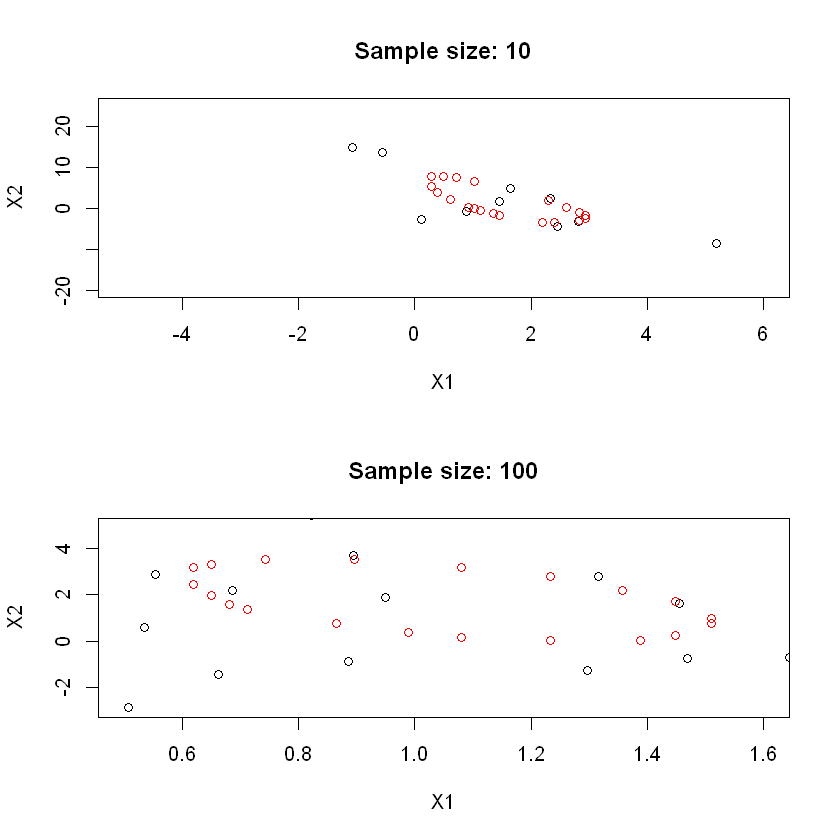

In [4]:
par(mfrow=c(2,1))

sample_size = 10 # 5 at minimum
plot(first_sample_observations[1:sample_size,],xlab="X1",ylab="X2",main=paste0('Sample size: ',sample_size), xlim=c(-5,6), ylim=c(-20,25))
#polygon(first_sample_ellipses[[sample_size - 4]])
points(first_sample_ellipses[[sample_size - 4]], col='red')

sample_size = N
plot(first_sample_observations[1:sample_size,],xlab="X1",ylab="X2",main=paste0('Sample size: ',sample_size), xlim=c(0.5,1.6), ylim=c(-3,5))
#polygon(first_sample_ellipses[[sample_size - 4]])
points(first_sample_ellipses[[sample_size - 4]], col='red')

## Draw 99 samples of bivariate normal data and calculate corresponding CRs

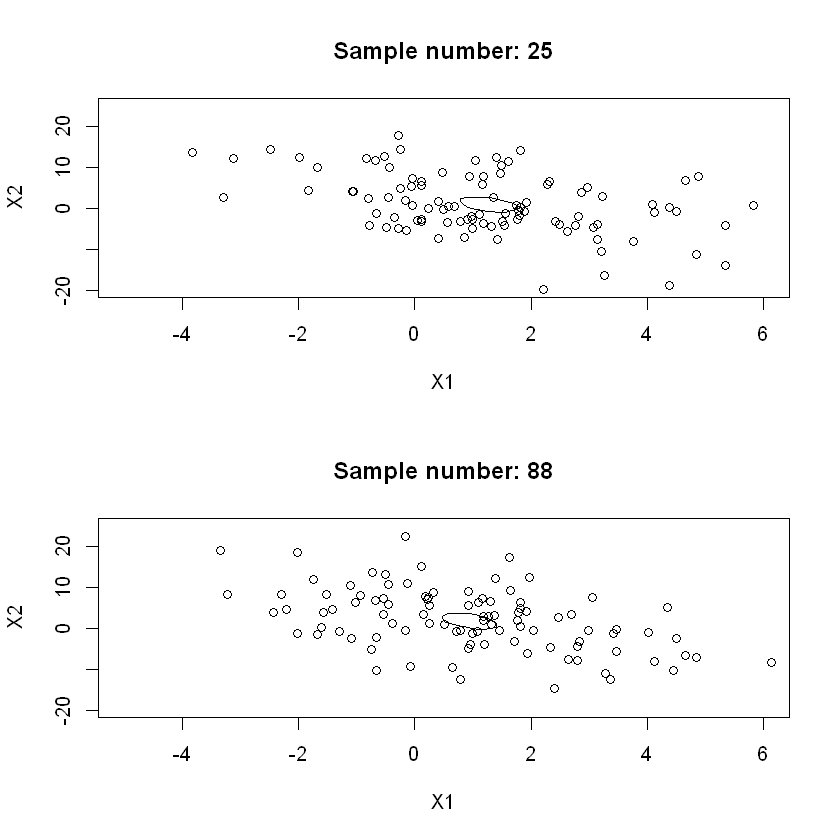

In [5]:
par(mfrow=c(2,1))
additional_ellipses = c()
for (i in 1:99){
    crt_sample = mvrnorm(N, mu = mu, Sigma = sigma )
    crt_sample = as.data.frame(crt_sample)
    colnames(crt_sample) = c("value1","value2")

    if (i==25 || i==88){
        plot(crt_sample,xlab="X1",ylab="X2",main=paste0('Sample number: ',i), xlim=c(-5,6), ylim=c(-20,25))
                
        # 'cset' from jocre
        cset_gg = cset(crt_sample, method = "boot.kern", alpha=(1-cl)) 
        crt_ellipse = cset_gg$cr[chull(cset_gg$cr), -3]
        polygon(crt_ellipse)
        
    } else {
        # 'cset' from jocre
        cset_gg = cset(crt_sample, method = "boot.kern", alpha=(1-cl)) 
        crt_ellipse = cset_gg$cr[chull(cset_gg$cr), -3]       
    }
    crt_ellipse = as.data.frame(crt_ellipse)
    crt_ellipse = crt_ellipse[!duplicated(crt_ellipse), ]    
    colnames(crt_ellipse) = c("x","y")
    additional_ellipses[[i]] = crt_ellipse    
}

## Plot some additional confidence regions that do not contain true value
Which of the additional 99 ellipses do not contain true value?
 - 4, 5, 38, 50, 71, 76, 85, 99

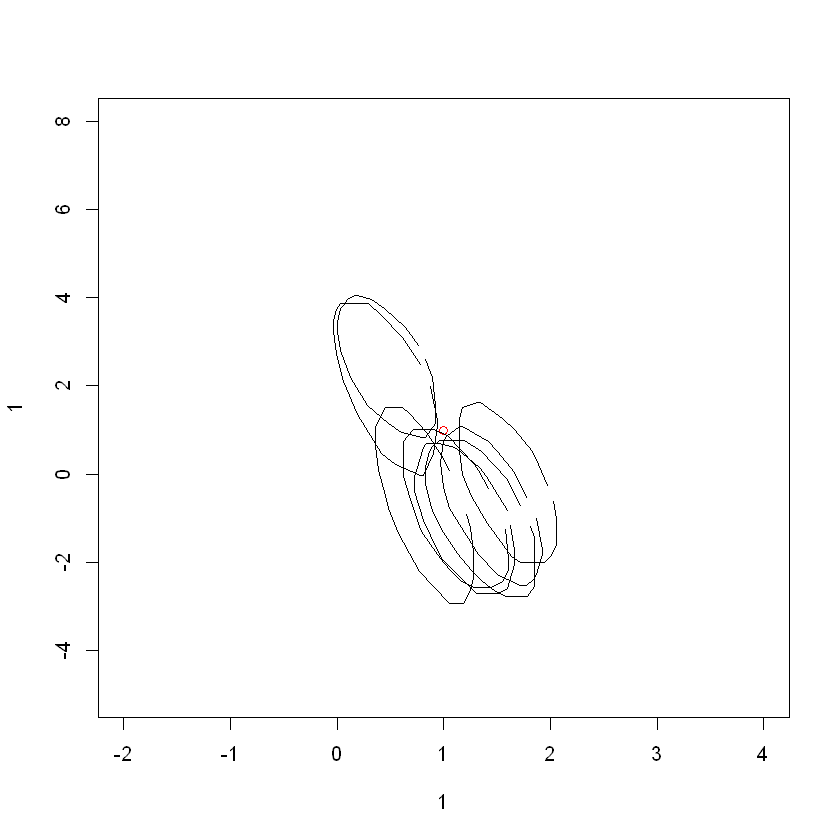

In [6]:
par(mfrow=c(1,1))
plot(x=1,y=1,col='red',xlim=c(-2,4), ylim=c(-5,8))

for (i in c(4, 5, 38, 50, 71, 76, 85, 99)){
    lines(additional_ellipses[[i]])
}